In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

file_path='/content/drive/MyDrive/FashionStyleRecom/styles.csv'

df=pd.read_csv(file_path,on_bad_lines='skip',encoding='utf-8') #skip malformed lines

df=df[['productDisplayName','gender','articleType','usage']]

df.dropna(inplace=True)
df.head()


/tmp/ipython-input-2-155997668.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,productDisplayName,gender,articleType,usage
0,Turtle Check Men Navy Blue Shirt,Men,Shirts,Casual
1,Peter England Men Party Blue Jeans,Men,Jeans,Casual
2,Titan Women Silver Watch,Women,Watches,Casual
3,Manchester United Men Solid Black Track Pants,Men,Track Pants,Casual
4,Puma Men Grey T-shirt,Men,Tshirts,Casual


In [3]:
from sklearn.preprocessing import OneHotEncoder

# encoding

encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(df[['gender','articleType','usage']]).toarray()

In [5]:
from sklearn.cluster import KMeans
# clustering

kmean=KMeans(n_clusters=4,random_state=42) # so result doesn't change
clusters=kmean.fit_predict(encoded_data)
df['cluster']=clusters

# analysing clusters
df.groupby('cluster')['articleType'].value_counts(normalize=True).unstack().fillna(0)

df['cluster'].value_counts()

,count
cluster,
1,22384
0,14517
3,4025
2,3179


In [9]:
df.groupby('cluster')['articleType'].value_counts(normalize=True).unstack().fillna(0)

articleType,Accessory Gift Set,Baby Dolls,Backpacks,Bangle,Basketballs,Bath Robe,Beauty Accessory,Belts,Blazers,Body Lotion,...,Trunk,Tshirts,Tunics,Umbrellas,Waist Pouch,Waistcoat,Wallets,Watches,Water Bottle,Wristbands
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000964,0.002342,0.004340,0.000000,0.001171,0.000207,0.018117,0.000138,0.000207,...,0.000000,0.066680,0.013846,0.000413,0.000000,0.000344,0.032031,0.062134,0.000000,0.000000
1,0.004333,0.000000,0.027118,0.000625,0.000089,0.000000,0.000000,0.024571,0.000268,0.000000,...,0.006254,0.229807,0.000045,0.000000,0.000759,0.000447,0.020684,0.071078,0.000268,0.000089
2,0.000000,0.000000,0.000000,0.002517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.008493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.020621,0.000000,0.002733,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.237267,0.000000,0.000000,0.000000,0.000000,0.000000,0.012174,0.001242,0.001242


In [16]:
# mapping
cluster_labels = {
    0: "Streetwear",
    1: "Daily essentials",
    2: "Accessories & Grooming",
    3: "TopsCollection"
}
df['style'] = df['cluster'].map(cluster_labels)
df['style'].value_counts()

,count
style,
Daily essentials,22384
Streetwear,14517
TopsCollection,4025
Accessories & Grooming,3179


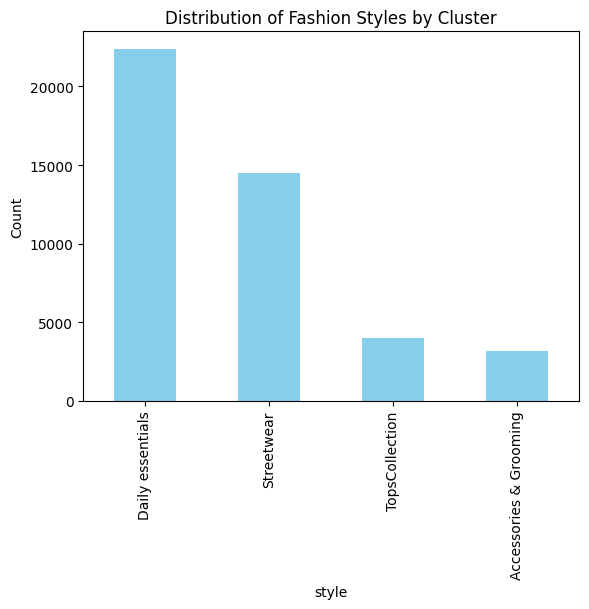

In [12]:
import matplotlib.pyplot as plt

df['style'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Fashion Styles by Cluster")
plt.ylabel("Count")
plt.show()

In [13]:
# Save to CSV
df.to_csv("final_styles.csv", index=False)

print("Clustering complete. Output saved to final_styles.csv")

Clustering complete. Output saved to final_styles.csv
